## Assignment #3: Cellular Automata
## PHYS481 FALL2020
## Yauheni Kalionau (30062335)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import mpmath

## Introduction
Cellular Automata is a type of a basic discrete computational algorithm, which applies a predefined rule to a grid of cells, where each cell can only be in a finite number of states. For example, this assignment examines probably one of the most trivial distributions of states - either "1" or "0". The state of each cell also depends on the state of its neighbours, and the state of the same cell in the previous generation. So, if we were to run CA for a specified number of generations, we will be able to observe how each cell evolves with time, and some rules can produce visually appealing fractal patterns. Application of certain rules results in organized behaviour, others behave almost randomly (e.g. rule 73 is 90% random according to calculations). Cellular Automata principles can be useful when applied to computer processor encoding, or in cryptography to generate random numbers (comes out it's more like pseudorandom), and in several ways of minor importance.


In the first part of the assignment, I have defined 6 different rules according to which I will run CA. Then I will calculate the entropy of each rule (among the one I've chosen - there are many more rules and perhaps some are even more random than my chosen sample) to find out which rule is the most random. Then, I will define a function to generate a "pseudorandom" 64-bit integer based on the rule with the highest entropy (the most chaotic one). Finally, I am going to use a piece of code provided by Dr. Brian Jackel to find out the dependence of cellular entropy on the cell number (for this part I had to use the code provided by Dr. Brian because the entropy function I have used before to identify the rule with the highest entropy calculates the entropy of the entire generation, not the entropy of a single cell). In the last part, (I am not sure if it was optional or not - we were not given clear instructions as to what has to be accomplished), I used "stepper#3" function from file "phys481_game_of_life" provided by Dr. Brian Jackel to generate a sequence of "nsteps"-generations of Conway's Game Of Life to see the algorithm on which CA is based in practice. 

## Question 1: Coding basic Cellular Automata.
I have utilized rules 30, 50, 90, 110, 150 and 73 to research the behaviour of a basic Cellular Automata. The graphs displaying the relationship between generation number and generation configuration will be plotted later in the report. The first part below presents functions encoding each of those rules.

In [2]:
def rule30(array):

    """
    Determines the value for each 
    cell (1/0) in the span of one generation
    according to RULE 30.
    """


    nextgen = np.zeros(len(array), dtype = np.int)
    size = len(array)
    for ind in range(size):
        if (ind == 0):
            nextgen[ind] = 0    #left boundary condition artificial set up
        if (ind == (size-1)):
            nextgen[ind] = 0    #right boundary condition artificial set up
        else:
            if (array[ind-1] == 1 and array[ind] == 1 and array[ind+1] == 1):
                nextgen[ind] = 0
            if (array[ind-1] == 1 and array[ind] == 1 and array[ind+1] == 0):
                nextgen[ind] = 0 
            if (array[ind-1] == 1 and array[ind] == 0 and array[ind+1] == 1):
                nextgen[ind] = 0
            if (array[ind-1] == 1 and array[ind] == 0 and array[ind+1] == 0):
                nextgen[ind] = 1
            if (array[ind-1] == 0 and array[ind] == 1 and array[ind+1] == 1):
                nextgen[ind] = 1 
            if (array[ind-1] == 0 and array[ind] == 1 and array[ind+1] == 0):
                nextgen[ind] = 1
            if (array[ind-1] == 0 and array[ind] == 0 and array[ind+1] == 1):
                nextgen[ind] = 1 
            if (array[ind-1] == 0 and array[ind] == 0 and array[ind+1] == 0):
                nextgen[ind] = 0
    return nextgen




In [9]:
def rule110(array):

    """
    Determines the value for each 
    cell (1/0) in the span of one generation
    according to RULE 110.
    """


    nextgen = np.zeros(len(array), dtype = np.int)
    size = len(array)
    for ind in range(size):
        if (ind == 0):
            nextgen[ind] = 0    #left boundary condition artificial set up
        if (ind == (size-1)):
            nextgen[ind] = 0    #right boundary condition artificial set up
        else:
            if (array[ind-1] == 1 and array[ind] == 1 and array[ind+1] == 1):
                nextgen[ind] = 0
            if (array[ind-1] == 1 and array[ind] == 1 and array[ind+1] == 0):
                nextgen[ind] = 1 
            if (array[ind-1] == 1 and array[ind] == 0 and array[ind+1] == 1):
                nextgen[ind] = 1
            if (array[ind-1] == 1 and array[ind] == 0 and array[ind+1] == 0):
                nextgen[ind] = 0
            if (array[ind-1] == 0 and array[ind] == 1 and array[ind+1] == 1):
                nextgen[ind] = 1 
            if (array[ind-1] == 0 and array[ind] == 1 and array[ind+1] == 0):
                nextgen[ind] = 1
            if (array[ind-1] == 0 and array[ind] == 0 and array[ind+1] == 1):
                nextgen[ind] = 1 
            if (array[ind-1] == 0 and array[ind] == 0 and array[ind+1] == 0):
                nextgen[ind] = 0
    return nextgen



In [3]:
def rule90(array):

    """
    Determines the value for each 
    cell (1/0) in the span of one generation
    according to RULE 90.
    """


    nextgen = np.zeros(len(array), dtype = np.int)
    size = len(array)
    for ind in range(size):
        if (ind == 0):
            nextgen[ind] = 0    #left boundary condition artificial set up
        if (ind == (size-1)):
            nextgen[ind] = 0    #right boundary condition artificial set up
        else:
            if (array[ind-1] == 1 and array[ind] == 1 and array[ind+1] == 1):
                nextgen[ind] = 0
            if (array[ind-1] == 1 and array[ind] == 1 and array[ind+1] == 0):
                nextgen[ind] = 1 
            if (array[ind-1] == 1 and array[ind] == 0 and array[ind+1] == 1):
                nextgen[ind] = 0
            if (array[ind-1] == 1 and array[ind] == 0 and array[ind+1] == 0):
                nextgen[ind] = 1
            if (array[ind-1] == 0 and array[ind] == 1 and array[ind+1] == 1):
                nextgen[ind] = 1 
            if (array[ind-1] == 0 and array[ind] == 1 and array[ind+1] == 0):
                nextgen[ind] = 0
            if (array[ind-1] == 0 and array[ind] == 0 and array[ind+1] == 1):
                nextgen[ind] = 1 
            if (array[ind-1] == 0 and array[ind] == 0 and array[ind+1] == 0):
                nextgen[ind] = 0
    return nextgen



In [4]:
def rule50(array):

    """
    Determines the value for each 
    cell (1/0) in the span of one generation
    according to RULE 50.
    """


    nextgen = np.zeros(len(array), dtype = np.int)
    size = len(array)
    for ind in range(size):
        if (ind == 0):
            nextgen[ind] = 0    #left boundary condition artificial set up
        if (ind == (size-1)):
            nextgen[ind] = 0    #right boundary condition artificial set up
        else:
            if (array[ind-1] == 1 and array[ind] == 1 and array[ind+1] == 1):
                nextgen[ind] = 0
            if (array[ind-1] == 1 and array[ind] == 1 and array[ind+1] == 0):
                nextgen[ind] = 0 
            if (array[ind-1] == 1 and array[ind] == 0 and array[ind+1] == 1):
                nextgen[ind] = 1
            if (array[ind-1] == 1 and array[ind] == 0 and array[ind+1] == 0):
                nextgen[ind] = 1
            if (array[ind-1] == 0 and array[ind] == 1 and array[ind+1] == 1):
                nextgen[ind] = 0 
            if (array[ind-1] == 0 and array[ind] == 1 and array[ind+1] == 0):
                nextgen[ind] = 0
            if (array[ind-1] == 0 and array[ind] == 0 and array[ind+1] == 1):
                nextgen[ind] = 1 
            if (array[ind-1] == 0 and array[ind] == 0 and array[ind+1] == 0):
                nextgen[ind] = 0
    return nextgen

In [5]:
def rule150(array):

    """
    Determines the value for each 
    cell (1/0) in the span of one generation
    according to RULE 150.
    """


    nextgen = np.zeros(len(array), dtype = np.int)
    size = len(array)
    for ind in range(size):
        if (ind == 0):
            nextgen[ind] = 1    #left boundary condition artificial set up
        if (ind == (size-1)):
            nextgen[ind] = 1    #right boundary condition artificial set up
        else:
            if (array[ind-1] == 1 and array[ind] == 1 and array[ind+1] == 1):
                nextgen[ind] = 1
            if (array[ind-1] == 1 and array[ind] == 1 and array[ind+1] == 0):
                nextgen[ind] = 0 
            if (array[ind-1] == 1 and array[ind] == 0 and array[ind+1] == 1):
                nextgen[ind] = 0
            if (array[ind-1] == 1 and array[ind] == 0 and array[ind+1] == 0):
                nextgen[ind] = 1
            if (array[ind-1] == 0 and array[ind] == 1 and array[ind+1] == 1):
                nextgen[ind] = 0 
            if (array[ind-1] == 0 and array[ind] == 1 and array[ind+1] == 0):
                nextgen[ind] = 1
            if (array[ind-1] == 0 and array[ind] == 0 and array[ind+1] == 1):
                nextgen[ind] = 1 
            if (array[ind-1] == 0 and array[ind] == 0 and array[ind+1] == 0):
                nextgen[ind] = 0
    return nextgen

In [6]:
def rule73(array):

    """
    Determines the value for each 
    cell (1/0) in the span of one generation
    according to RULE 73.
    """


    nextgen = np.zeros(len(array), dtype = np.int)
    size = len(array)
    for ind in range(size):
        if (ind == 0):
            nextgen[ind] = 1    #left boundary condition artificial set up
        if (ind == (size-1)):
            nextgen[ind] = 1    #right boundary condition artificial set up
        else:
            if (array[ind-1] == 1 and array[ind] == 1 and array[ind+1] == 1):
                nextgen[ind] = 0
            if (array[ind-1] == 1 and array[ind] == 1 and array[ind+1] == 0):
                nextgen[ind] = 1 
            if (array[ind-1] == 1 and array[ind] == 0 and array[ind+1] == 1):
                nextgen[ind] = 0
            if (array[ind-1] == 1 and array[ind] == 0 and array[ind+1] == 0):
                nextgen[ind] = 0
            if (array[ind-1] == 0 and array[ind] == 1 and array[ind+1] == 1):
                nextgen[ind] = 1 
            if (array[ind-1] == 0 and array[ind] == 1 and array[ind+1] == 0):
                nextgen[ind] = 0
            if (array[ind-1] == 0 and array[ind] == 0 and array[ind+1] == 1):
                nextgen[ind] = 0 
            if (array[ind-1] == 0 and array[ind] == 0 and array[ind+1] == 0):
                nextgen[ind] = 1
    return nextgen

 ## The next is the part where I plot "ngen vs. ncells" for each of the rules. I have used a significantly bigger grid sizes over the span of many generations for some examples to make them more visually appealing:

Text(0.5, 1.0, &#39;CA RULE 30&#39;)

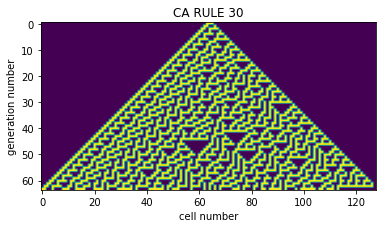

In [44]:
#Creating input array with one "1" inserted in the middle to initialize
#the sequence of alternating 1's and 0's:
ncells = 128
state = np.zeros(ncells, dtype = np.int)
state[ncells//2] = 1

#The following block of code determines
#for how many generations (ngen) 2D cellular 
#automata will run and the plots "ngen vs. cell_num":

ngen = 64
grid = np.ndarray( [ngen, len(state)], dtype=np.int8)
for n in range(ngen):
    result = rule30(state)
    state = result
    grid[n,:] = state
    
plt.imshow(grid)
plt.xlabel('cell number')
plt.ylabel('generation number')
plt.title('CA RULE 30')



Text(0.5, 1.0, &#39;CA RULE 110&#39;)

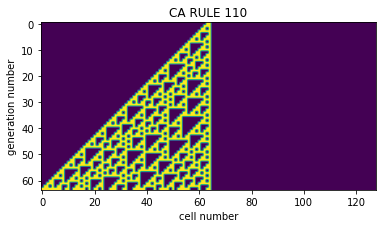

In [45]:
#Similar
ncells = 128
state = np.zeros(ncells, dtype = np.int)
state[ncells//2] = 1

ngen = 64
grid = np.ndarray( [ngen, len(state)], dtype=np.int8)
for n in range(ngen):
    result = rule110(state)
    state = result
    grid[n,:] = state
    
plt.imshow(grid)
plt.xlabel('cell number')
plt.ylabel('generation number')
plt.title('CA RULE 110')

Text(0.5, 1.0, &#39;CA RULE 90&#39;)

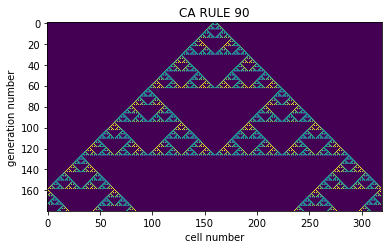

In [46]:
#Similar
ncells = 320
state = np.zeros(ncells, dtype = np.int)
state[ncells//2] = 1

ngen = 180
grid = np.ndarray( [ngen, len(state)], dtype=np.int8)
for n in range(ngen):
    result = rule90(state)
    state = result
    grid[n,:] = state
    
plt.imshow(grid)
plt.xlabel('cell number')
plt.ylabel('generation number')
plt.title('CA RULE 90')

Text(0.5, 1.0, &#39;CA RULE 50&#39;)

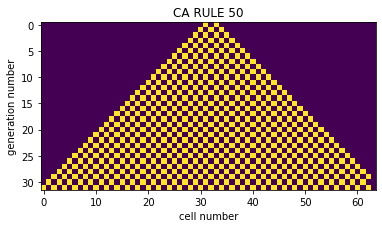

In [47]:
#Similar
ncells = 64
state = np.zeros(ncells, dtype = np.int)
state[ncells//2] = 1

ngen = 32
grid = np.ndarray( [ngen, len(state)], dtype=np.int8)
for n in range(ngen):
    result = rule50(state)
    state = result
    grid[n,:] = state
    
plt.imshow(grid)
plt.xlabel('cell number')
plt.ylabel('generation number')
plt.title('CA RULE 50')

Text(0.5, 1.0, &#39;CA RULE 150&#39;)

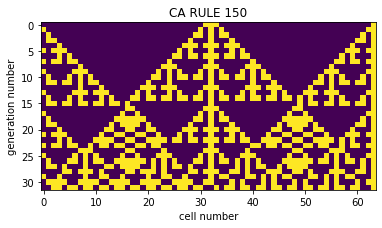

In [48]:
#Similar
ncells = 64
state = np.zeros(ncells, dtype = np.int)
state[ncells//2] = 1

ngen = 32
grid = np.ndarray( [ngen, len(state)], dtype=np.int8)
for n in range(ngen):
    result = rule150(state)
    state = result
    grid[n,:] = state
    
plt.imshow(grid)
plt.xlabel('cell number')
plt.ylabel('generation number')
plt.title('CA RULE 150')


Text(0.5, 1.0, &#39;CA RULE 73&#39;)

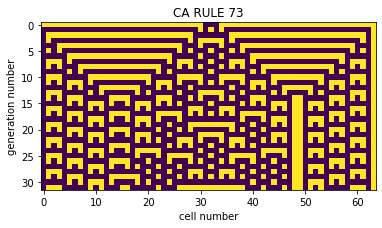

In [49]:
#Similar
ncells = 64
state = np.zeros(ncells, dtype = np.int)
state[ncells//2] = 1

ngen = 32
grid = np.ndarray( [ngen, len(state)], dtype=np.int8)
for n in range(ngen):
    result = rule73(state)
    state = result
    grid[n,:] = state
    
plt.imshow(grid)
plt.xlabel('cell number')
plt.ylabel('generation number')
plt.title('CA RULE 73')

## Calculating entropy for each of the 5 chosen rules:
Function credentials are given to Dr. Brian Jackel. I have just slightly modified it.

In [7]:
def entropy(state, rule_number, nsteps=1000, preheat_temp=50):
    
    """Calculates entripy for a given generation"""

    generation_state=list(np.zeros([nsteps,len(state)],dtype=np.int8))
    for n in range(nsteps):
        if n <= preheat_temp:
            continue
        else:
            state = rule_number(state)
            generation_state[n]=state
    catalog={}
    for n in generation_state:
        if tuple(n) in catalog:
            catalog[tuple(n)] += 1
        else:
            catalog[tuple(n)] = 1
    values = np.array(list(catalog.values()))
    prob = values/nsteps
    entropy = -np.sum(prob*np.log2(prob))
    return [entropy]

In [10]:
ncells = 64
state = np.zeros(ncells, dtype = np.int)
state[ncells//2] = 1
entropy_R30 = entropy(state, rule30)
entropy_R90 = entropy(state, rule90)
entropy_R110 = entropy(state, rule110)
entropy_R150 = entropy(state, rule150)
entropy_R50 = entropy(state, rule50)
entropy_R73 = entropy(state, rule73)

print(entropy_R30, entropy_R90, entropy_R110, entropy_R150, entropy_R50, entropy_R73)
print("The highest entropy and thus the degree of randomness is associated with rule number 73")

[2.601316262768905] [0.7044937071226641] [3.4728636245641225] [5.9841799107158975] [1.5489263611601902] [9.676490592221542]
The highest entropy and thus the degree of randomness is associated with rule number 73


## Question 2: write a function to generate a pseudorandom 64-bit integer.
A 64-bit integer can be generated by a straight application of the rule with highest entropy, in my case "Rule 73", and defining the number of steps (in other words for how many generations) Cellular Automata should run. I failed to visualize if the entropy of each generation is increasing with time or stays the same (?), but I do understand that the if we run the algorithm for many more steps (say 1000 like in the example below), then the degree of randomness will increase as well. Thus, entropy and associated degree of randomness of a generated number will be increasing with each generation (or time) step. Correct me if this logic doesn't make sense.

In [58]:
def pseudorandom(nsteps):

    """Pseudorandom function uses Rule 73
    (as a highest entropy rules
    among chosen) to generate a
    pseudorandom 64-bit integer"""

    ncells = 64
    state = np.zeros(ncells, dtype = np.int)
    state[ncells//2] = 1
    for n in range(nsteps):
        result = rule110(state)
        state = result

    
    binary_str = ""
    for i in state:
        binary_str += str(i)
    return print("Pseudorandom number generator has produced the following number:", int(binary_str,2))

#Running a program to create a pseudorandom binary number based on Rule 73 (since it has the highest entropy):
nsteps = 10 #aka number of generations to run CA through
result = pseudorandom(nsteps)



Pseudorandom number generator has produced the following number: 3876207984640


## Question 3: do the entropies depend on the cell number?
Yes, entropies do depend on the cell number, but the relationship is not obvious nor I can fit it into any reasonably justified logic. Functions credit is given to Dr. Brian Jackel (symbol_entropy and automata1_stepgrid).

In [59]:
def symbol_entropy(symbol_sequence, group_nsymbols=1):
    """
    Taken from spamlet notes.
    """
    countdict = {}
    nseq = len(symbol_sequence)

    for indx in range( 0, nseq-group_nsymbols): #nseq-group_nsymbols): #, group_nsymbols):
        symbol = tuple( symbol_sequence[indx:indx+group_nsymbols] )
        if symbol in countdict:
            countdict[symbol] += 1
        else:
            countdict[symbol] = 1
            
    counts = np.array( [countdict[symbol] for symbol in countdict]) #; print(counts)
    prob = counts / np.sum(counts)
    entropy = -np.sum( prob * np.log2(prob) ) #/ group_nsymbols
    
    return dict( entropy=entropy , symbols = list(countdict.keys()) )

In [60]:
def automata1d_stepgrid(ncells=64, nsteps=999, rule_number=1, entropy_group=(1,2,3), entropy_cell=None, plot_grid=False):
    """
    based on 1d cellular automata class notes
    """
    value = np.zeros(ncells, dtype=np.int8)
    value[ len(value)//2 ] = 1  # initialize middle cell

    grid = np.ndarray( [nsteps, len(value)], dtype=np.int8)

    for n in range(nsteps):
        value = rule73(value)
        grid[n,:] = value
     
    entropy_cell = ncells//2 if entropy_cell is None else entropy_cell        
    entropy = {}
    for ngroup in entropy_group: #[1,2,3,4]:
        entropy[ngroup] = symbol_entropy( grid[100:,entropy_cell] , ngroup )
    
    if plot_grid:
        plt.imshow(grid.T)
        plt.grid(False)
        plt.ylabel('cell number')
        plt.xlabel('step number')
        plt.title('CA rule '+str(rule_number))
        plt.xlim(0, 199) #nsteps) #5000,5150)                
            
    return dict( grid=grid, entropy=entropy )

In [61]:
stack = []
rulenum = 73
for cellnum in range(0,64):
    result = automata1d_stepgrid(ncells=64, nsteps=999, rule_number=rulenum, 
        plot_grid=False, entropy_cell=cellnum, entropy_group=(1,2,3) ) 

    ent = result['entropy']    
    stack.append( (ent[1]['entropy'], ent[2]['entropy'], ent[3]['entropy']) )

stack = np.array(stack)

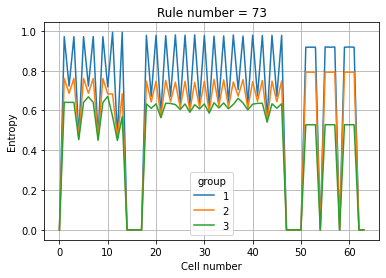

In [62]:
for indx,entnum in enumerate([1,2,3]):
    plt.plot(stack[:,indx] / entnum, label=str(entnum))  
plt.title('Rule number = '+str(rulenum))
plt.ylabel('Entropy')
plt.xlabel('Cell number')
plt.legend(loc=0, title='group')
plt.grid('True')

## Question 4: examining the steady-state behaviour of a grid with the help of stepper functions from "phys481_game_of_life" file. calculating mean and standart deviation. Comparing the degree of chaos (entropy) for different configurations of cellgrids.
I have chosen stepper#3 function for this part since according to my measurements the time required to execute this function (using "timeit" function), it is the fastest among other steppers'. The grid below represents a sequence of steps of Conway's Game of Life with a 0.5 probability that half of all cells are turned on. Obviously, the conslusion is: the more steps you choose the longer the "game" will evolve increasing its own entropy with each successive generation eventually becoming quite random (as much as computer permits since computers are by default deterministic so it's not "the real" randomness as in nature). 

In [3]:
from phys481_game_of_life import stepper3, life_generation_stepper
import phys481_game_of_life as mylife

included by:  FrameInfo(frame=<frame at 0x0000021201DC5700, file '<frozen importlib._bootstrap>', line 219, code _call_with_frames_removed>, filename='<frozen importlib._bootstrap>', lineno=219, function='_call_with_frames_removed', code_context=None, index=None)


The manual calculation of mean produced: 0.2095 calculated for 10 generations.
The numpy function 'mean' found mean to be: 0.2095 calculated for 10 generations.
The standart deviation of an array after 10 generations was found to be: 0.406951778470128
The average entropy of the entire cellgrid after 10 generations, was found to be: 2.282538679814288


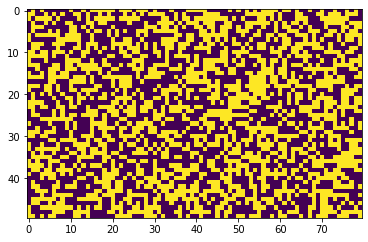

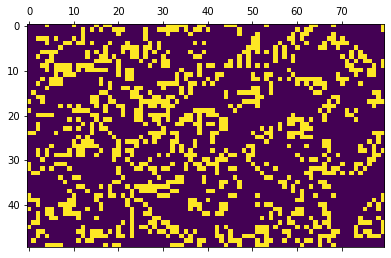

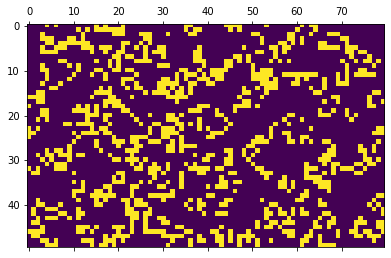

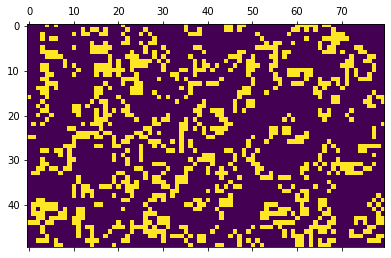

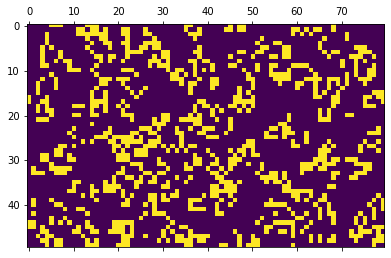

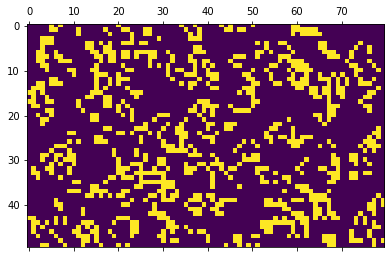

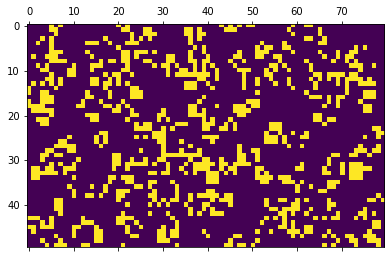

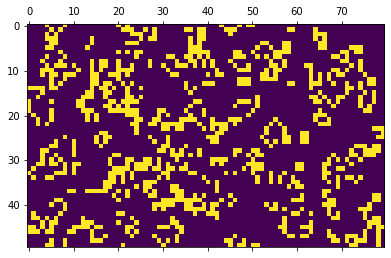

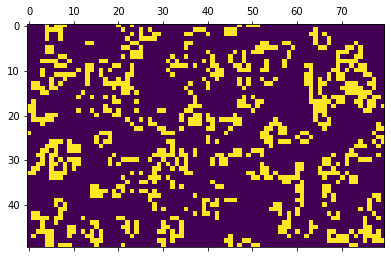

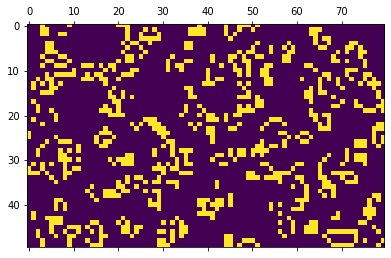

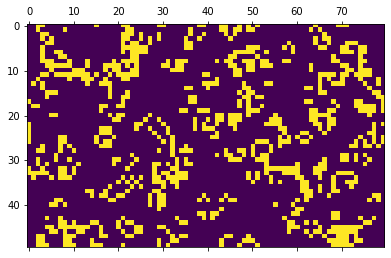

In [27]:
grid = np.random.rand(50,80) > 0.5
p=plt.imshow(grid)  
newgrid = stepper3(grid, nsteps=10)


#You can specify the number of steps inside range function below:

nsteps2 = 10
for i in range(nsteps2):
    newgrid = stepper3(newgrid, nsteps=10)
    p = plt.matshow(newgrid)

#Calculating mean and standart deviation: 
#(manual mean calculation)
mean = 0
for i in newgrid:
    for k in i:
        if k == True:
            mean += 1
        else:
            mean += 0

#Utilizing numpy 'mean' and 'std' function:
mean_mnl = mean/newgrid.size
stdv = mpmath.mpf(np.std(newgrid))

print("The manual calculation of mean produced:", mean_mnl, "calculated for", nsteps2, "generations.")
print("The numpy function 'mean' found mean to be:", np.mean(newgrid), "calculated for", nsteps2, "generations.")
print("The standart deviation of an array after", nsteps2, "generations was found to be:", stdv)

#Calculating entropy of each cell after nsteps2 generations (steps), then utilizing numpy 'mean' function to find the
#mean of all entropies in the newgrid, which is basically somewhat like an average illustration of entropy in our system(cellgrid):
entropies = sc.entropy(newgrid)
print("The average entropy of the entire cellgrid after", nsteps2, "generations, was found to be:", np.mean(entropies))







I have tried examining the Game of Life for different probability densities ranging from 0 to 1 as written in the guidelines. The result: those examples with a relatively low initially induced probability of cells being turned on, produce lower levels of entropy, i.e. chaos propagates slower from generation to generation for such systems. For example, the entropy of a single state after 10 "life steps" for "p=0.5" was ~2.06 and for "p=0.7" it was ~2.42. This proves the statement above. This result implies that seemingly disorganized systems might end up being quite organized. I can attempt to explain this by proposing that by letting a greater number of cells being switched on initially, we increase the degree of places where a higher disorder may appear thus when it compounds, the overall entropy becomes much much greater. Finally, one more observation - the entropy of the system starts to decline after approximately 12-13 generations until it reaches a certain level of organization (in my case entropy_stable_state ~ 2.0). This implies that seemingly disorganized systems may end up possessing a relatively structured order of existence that is quite mindboggling from my point of view because the human brain would expect the entropy to keep rising. More on this topic in conclusion.

## Discussion and Conclusion:
Cellular Automata is a peculiar concept to study and even though it is probably not that useful, in a sense that there are not so many applications for it, it is still a very interesting algorithmic phenomenon to study entropy and evolution of a more complex system. There are plenty of rules for encoding CA, but only some of them result in beautiful patterns worth studying them. What I find to be even more exciting is that seemingly organized systems (e.g. go back to entropy calculation for Rule 73), can be quite random in reality. However, the human brain is completely incapable of understanding probabilities simply because our brain has not been evolving as fast as the technological advance of humanity. Finally, who knows, perhaps eventually it will help scientists to imitate a system as complex as the planet Earth, what can be useful to make predictions about climate, ocean currents, the interrelationship between ostensibly unrelated events (aka "Butterfly Effect") to make the world and human lives better and to mitigate the degree of impact humanity is producing on nature. 